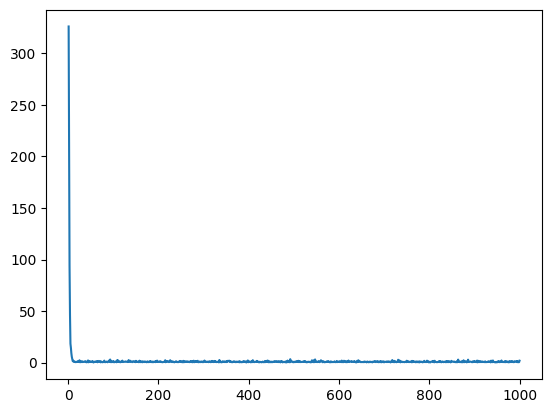

In [77]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df=pandas.read_csv(r'E:\Study\Python\the_third_course\temperature_dataset.csv')
data=np.array(df)
learning_rate=0.0001
m_train=3000
m_test=np.shape(data)[0]-3000
iteration=1
epochs=10
mini_batch=30
rng=np.random.default_rng(1)
m_all=data.shape[0]
d=data.shape[1]-1
x_train=data[:m_train,1:].T
x_test=data[m_train:,1:].T
y_train=data[0:m_train,0].T
y_test=data[m_train:,0].T
w=np.zeros((d,1)).reshape(-1,1)
v=np.ones((mini_batch,1))
b=0
train_set=data[0:m_train,:]
cost_saved=[]

for epoch in range(0,epochs):
    rng.shuffle(train_set)
    for i in range(0,m_train//mini_batch):
        x=train_set[i*mini_batch:(i+1)*mini_batch,1:].T
        y=train_set[i*mini_batch:(i+1)*mini_batch,0].T
        y_hat=np.dot(w.T,x)+b
        
        e=y_hat-y
        w=w-2*learning_rate*np.dot(x,e.T)/mini_batch
        b=b-2*learning_rate*np.dot(e,v)/mini_batch
        cost=np.dot(e,e.T)/mini_batch
        cost_saved.append(cost.item(0))
        
y_hat_train=np.dot(w.T,x_train)+b*v
e=y_hat_train-y_train
mse_train=np.dot(e,e.T)/m_train


y_hat_test=np.dot(w.T,x_test)+b
e=y_hat_test-y_test
mse_test=np.sqrt(np.dot(e,e.T)/m_test)


plt.plot(range(1,np.size(cost_saved)+1),cost_saved)
plt.show()
    